<a href="https://colab.research.google.com/github/Epvargas/Elyse-Statistics-Python/blob/main/Elyse_Statistics_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando modulos necesarios
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats 
import seaborn as sns 

np.random.seed(2016) # replicar random

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

# Graficando histograma

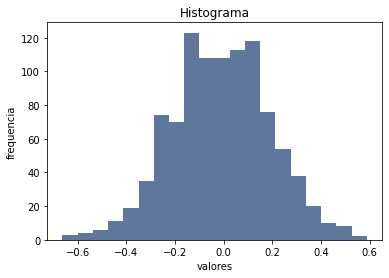

In [ ]:

# Graficando histograma
mu, sigma = 0, 0.2                             # media y desvio estandar

datos = np.random.normal(mu, sigma, 1000)      #creando muestra de datos

# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

# Graficando Exponencial

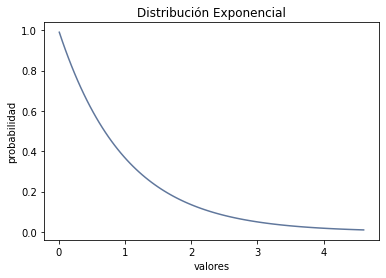

In [ ]:
# Graficando Exponencial
exponencial = stats.expon()

x = np.linspace(exponencial.ppf(0.01),
                exponencial.ppf(0.99), 100)

fp = exponencial.pdf(x)    # Función de Probabilidad

plt.plot(x, fp)
plt.title('Distribución Exponencial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

 # Función de Masa de Probabilidad
Otra forma de representar a las distribuciones discretas es utilizando su Función de Masa de Probabilidad o FMP, la cual relaciona cada valor con su probabilidad en lugar de su frecuencia como vimos anteriormente. 

Esta función es normalizada de forma tal que el valor total de probabilidad sea

1. La ventaja que nos ofrece utilizar la FMP es que podemos comparar dos distribuciones sin necesidad de ser confundidos por las diferencias en el tamaño de las muestras. 

También debemos tener en cuenta que FMP funciona bien si el número de valores es pequeño; pero a medida que el número de valores aumenta, la probabilidad asociada a cada valor se hace cada vez más pequeña y el efecto del ruido aleatorio aumenta. Veamos un ejemplo con Python.


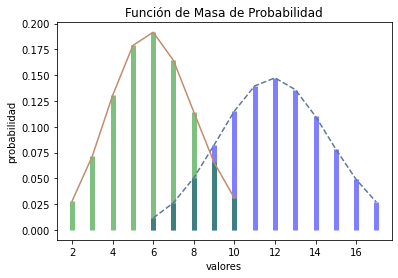

In [ ]:
# Graficando FMP
n, p = 30, 0.4              # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3          # parametros de forma de la distribución binomial

x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))

fmp = stats.binom.pmf(x, n, p)            # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1)    # Función de Masa de Probabilidad

plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

# Graficando Función de Distribución Acumulada con Python
Si queremos evitar los problemas que se generan con FMP cuando el número de valores es muy grande, podemos recurrir a utilizar la Función de Distribución Acumulada o FDA, para representar a nuestras distribuciones, tanto discretas como continuas. 

Esta función relaciona los valores con su correspondiente percentil; es decir que va a describir la probabilidad de que una variable aleatoria X sujeta a cierta ley de distribución de probabilidad se sitúe en la zona de valores menores o iguales a x.

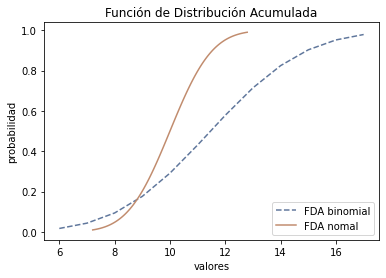

In [ ]:
# Graficando Función de Distribución Acumulada con Python
x_1 = np.linspace(stats.norm(10, 1.2).ppf(0.01),
                  stats.norm(10, 1.2).ppf(0.99), 100)

fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
fda_normal = stats.norm(10, 1.2).cdf(x_1) # Función de Distribución Acumulada

plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.plot(x_1, fda_normal, label='FDA nomal')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

##Distribución Poisson
La Distribución Poisson esta dada por la formula:
... buscar la formula

p(r;μ)=μre−μr!
En dónde r es un entero (r≥0) y μ es un número real positivo. 

La Distribución Poisson describe la probabilidad de encontrar exactamente r eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante μ. 

Es una de las distribuciones más utilizadas en estadística con varias aplicaciones; como por ejemplo describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios.

En Python la podemos generar fácilmente con la ayuda de scipy.stats, paquete que utilizaremos para representar a todas las restantes distribuciones a lo largo de todo el artículo.

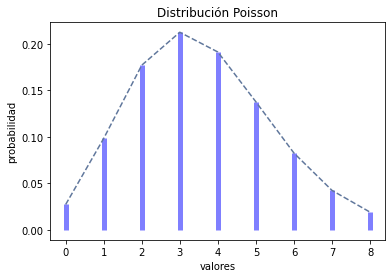

In [ ]:
# Graficando Poisson
mu =  3.6 # parametro de forma 

poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))

fmp = poisson.pmf(x) # Función de Masa de Probabilidad

plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

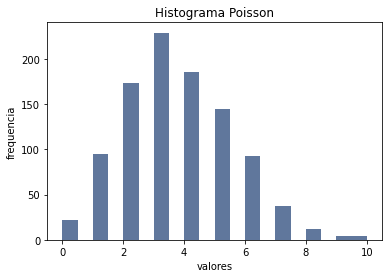

In [ ]:
# histograma
aleatorios = poisson.rvs(1000)  # genera aleatorios

cuenta, cajas, ignorar = plt.hist(aleatorios, 20)

plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

##Distribución Binomial
La Distribución Binomial esta dada por la formula:

p(r;N,p)=(Nr)pr(1−p)N−r
En dónde r con la condición 0≤r≤N y el parámetro N (N>0) son enteros; y el parámetro p (0≤p≤1) es un número real. 

La Distribución Binomial describe la probabilidad de exactamente r éxitos en N pruebas si la probabilidad de éxito en una sola prueba es p.

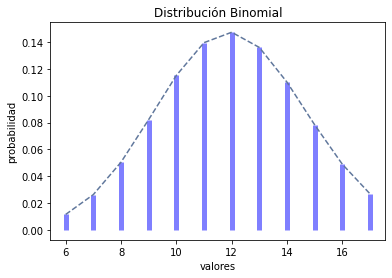

In [ ]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 

binomial = stats.binom(N, p) # Distribución

x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))

fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

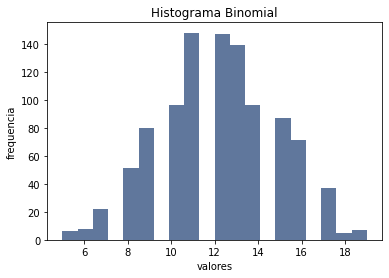

In [ ]:
# histograma
aleatorios = binomial.rvs(1000)  # genera aleatorios

cuenta, cajas, ignorar = plt.hist(aleatorios, 20)

plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

##Distribución Geométrica¶
La Distribución Geométrica esta dada por la formula:

p(r;p)=p(1−p)r−1
En dónde r≥1 y el parámetro p (0≤p≤1) es un número real. 

La Distribución Geométrica expresa la probabilidad de tener que esperar exactamente r pruebas hasta encontrar el primer éxito si la probabilidad de éxito en una sola prueba es p. 

Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

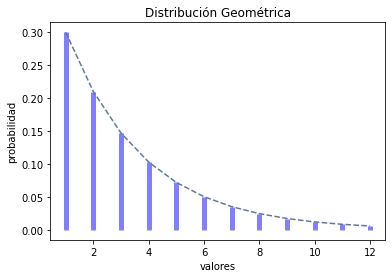

In [ ]:
# Graficando Geométrica
p =  0.3 # parametro de forma 

geometrica = stats.geom(p) # Distribución

x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))

fmp = geometrica.pmf(x) # Función de Masa de Probabilidad

plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

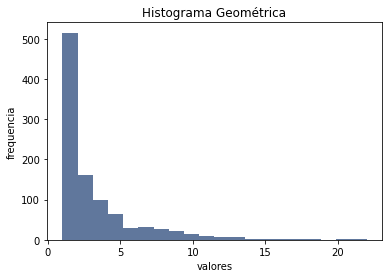

In [ ]:
# histograma
aleatorios = geometrica.rvs(1000)  # genera aleatorios

cuenta, cajas, ignorar = plt.hist(aleatorios, 20)

plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

##Distribución Hipergeométrica
La Distribución Hipergeométrica esta dada por la formula:

p(r;n,N,M)=(Mr)(N−Mn−r)(Nn)
En dónde el valor de r esta limitado por max(0,n−N+M) y min(n,M) inclusive; y los parámetros n (1≤n≤N), N (N≥1) y M (M≥1) son todos números enteros. 

La Distribución Hipergeométrica describe experimentos en donde se seleccionan los elementos al azar sin reemplazo (se evita seleccionar el mismo elemento más de una vez). 

Más precisamente, supongamos que tenemos N elementos de los cuales M tienen un cierto atributo (y N−M no tiene). Si escogemos n elementos al azar sin reemplazo, p(r) es la probabilidad de que exactamente r de los elementos seleccionados provienen del grupo con el atributo.

In [ ]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 

hipergeometrica = stats.hypergeom(M, n, N) # Distribución

x = np.arange(0, n+1)

fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad

plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()